# Auto Insurance Claims Fraud Detection

## 1.1 Data Exploration 

The most important reasons / steps are:

- Identify quality issues (e.g. missing values, wrong measurements, …)

- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)

- Get an idea on the value distribution of your data using statistical measures and visualizations

In [1]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('data/insurance_claims.csv')

In [3]:
nRow, nCol = data.shape
print(f'There are {nRow} and {nCol} columns.')

There are 1000 and 40 columns.


In [4]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type   collision_type incident_severity authorities_contacted incident_state incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make auto_model  auto_year fraud_reported  _c39
0                 328   48         521585       2014-10-17           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage                Police             SC      Columbus     9935 4th Drive                         5                            1             YES                1          2                     YES               71610          6510           13020          52080       Saab        92x       2004              Y   NaN
1                 228   42         342868       2006-06-27           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    2015-01-21             Vehicle Theft                ?      Minor Damage                Police             VA     Riverwood       6608 MLK Hwy                         8                            1               ?                0          0                       ?                5070           780             780           3510   Mercedes       E400       2007              Y   NaN
2                 134   29         687698       2000-09-06           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage                Police             NY      Columbus  7121 Francis Lane                         7                            3              NO                2          3                      NO               34650          7700            3850          23100      Dodge        RAM       2007              N   NaN
3                 256   41         227811       1990-05-25           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage                Police             OH     Arlington   6956 Maple Drive                         5                            1               ?                1          2                      NO               63400          6340            6340          50720  Chevrolet      Tahoe       2014              Y   NaN
4                 228   44         367455       2014-06-06           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    2015-02-17             Vehicle Theft                ?      Minor Damage                  None             NY     Arlington       3041 3rd Ave                        20                            1              NO                0          1                      NO                6500          1300             650           4550     Accura        RSX       2009              N   NaN

In [5]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  policy_annual_premium  umbrella_limit    insured_zip  capital-gains   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries    witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim    auto_year  _c39
count         1000.000000  1000.000000    1000.000000        1000.000000            1000.000000    1.000000e+03    1000.000000    1000.000000    1000.000000               1000.000000                   1000.00000      1000.000000  1000.000000          1000.00000   1000.000000     1000.000000    1000.000000  1000.000000   0.0
mean           203.954000    38.948000  546238.648000        1136.000000            1256.406150    1.101000e+06  501214.488000   25126.100000  -26793.700000                 11.644000                      1.83900         0.992000     1.487000         52761.94000   7433.420000     7399.570000   37928.950000  2005.103000   NaN
std            115.113174     9.140287  257063.005276         611.864673             244.167395    2.297407e+06   71701.610941   27872.187708   28104.096686                  6.951373                      1.01888         0.820127     1.111335         26401.53319   4880.951853     4824.726179   18886.252893     6.015861   NaN
min              0.000000    19.000000  100804.000000         500.000000             433.330000   -1.000000e+06  430104.000000       0.000000 -111100.000000                  0.000000                      1.00000         0.000000     0.000000           100.00000      0.000000        0.000000      70.000000  1995.000000   NaN
25%            115.750000    32.000000  335980.250000         500.000000            1089.607500    0.000000e+00  448404.500000       0.000000  -51500.000000                  6.000000                      1.00000         0.000000     1.000000         41812.50000   4295.000000     4445.000000   30292.500000  2000.000000   NaN
50%            199.500000    38.000000  533135.000000        1000.000000            1257.200000    0.000000e+00  466445.500000       0.000000  -23250.000000                 12.000000                      1.00000         1.000000     1.000000         58055.00000   6775.000000     6750.000000   42100.000000  2005.000000   NaN
75%            276.250000    44.000000  759099.750000        2000.000000            1415.695000    0.000000e+00  603251.000000   51025.000000       0.000000                 17.000000                      3.00000         2.000000     2.000000         70592.50000  11305.000000    10885.000000   50822.500000  2010.000000   NaN
max            479.000000    64.000000  999435.000000        2000.000000            2047.590000    1.000000e+07  620962.000000  100500.000000       0.000000                 23.000000                      4.00000         2.000000     3.000000        114920.00000  21450.000000    23670.000000   79560.000000  2015.000000   NaN

In [6]:
import pandas_profiling
profile = data.profile_report(style={'full_width':True})
profile

Note of the variables:
* month_as_customer is highly correlated with age
* auto_make is highly correlated with auto_model
* capital-gains has 508 (50.8%) zeros
* capital-loss has 475 (47.5%) zeros
* policy_bind_date has a high cardinality: 951 distinct values
* auto_model has 39 distinct values
* some values have ? to represent missing values
    * police_report_availiable
    * collision_type
    * property_damage
* incident_date has a high cardinality: 60 distinct values
* incident_location has a high cardinality
* insured_zip has a high cardinality: 995 distinct values
* policy_number is id - remove


In [7]:
# Check for missing values
missing_values = data.isnull().sum() * 100 / len(data)
missing_values.sort_values(ascending=False)

_c39                           100.0
fraud_reported                   0.0
incident_date                    0.0
capital-loss                     0.0
capital-gains                    0.0
insured_relationship             0.0
insured_hobbies                  0.0
insured_occupation               0.0
insured_education_level          0.0
insured_sex                      0.0
insured_zip                      0.0
umbrella_limit                   0.0
policy_annual_premium            0.0
policy_deductable                0.0
policy_csl                       0.0
policy_state                     0.0
policy_bind_date                 0.0
policy_number                    0.0
age                              0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
police_report_available          0.0
auto_year                        0.0
auto_model                       0.0
auto_make                        0.0
vehicle_claim                    0.0
p

Dataset has single column with all missing values. Drop it.

In [8]:
# Drop column _c39 with all NaN
data = data.drop(labels=['_c39'], axis=1)

Note: some columns have `?` for a value. That value represents unknown information.

In [9]:
# Convert date Columns to Datetime
data.loc[:, 'incident_date'] = pd.to_datetime(data.incident_date)
data.loc[:, 'policy_bind_date'] = pd.to_datetime(data.policy_bind_date)

In [10]:
# Convert other object columns to Categorical dtypes
data = data.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                         category
policy_csl                           category
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                          category
insured_education_level              category
insured_occupation                   category
insured_hobbies                      category
insured_relationship                 category
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                        category
collision_type                       category
incident_severity                    category
authorities_contacted             

### Check if data is balanced?
* Looking at below graph , the data looks imbalanced.

In [11]:
# Label encode target column with 0 and 1
data['fraud_reported'] = data['fraud_reported'].replace({'Y':1, 'N':0})

In [12]:
# How many frauds?
fraud_percentage = data.fraud_reported.sum() / len(data) * 100
print(f'Fraud percentage is: {fraud_percentage}%.')

Fraud percentage is: 24.7%.


In [13]:
# Check distribution of target variable
data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

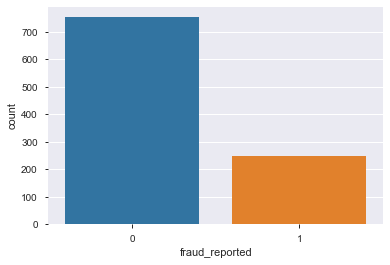

In [14]:
sns.countplot(x='fraud_reported', data=data);

### Check correlations

#### Pearson correlation - numerical variables
In human language, correlation is the measure of how two features are, well, correlated; just like the month-of-the-year is correlated with the average daily temperature, and the hour-of-the-day is correlated with the amount of light outdoors.

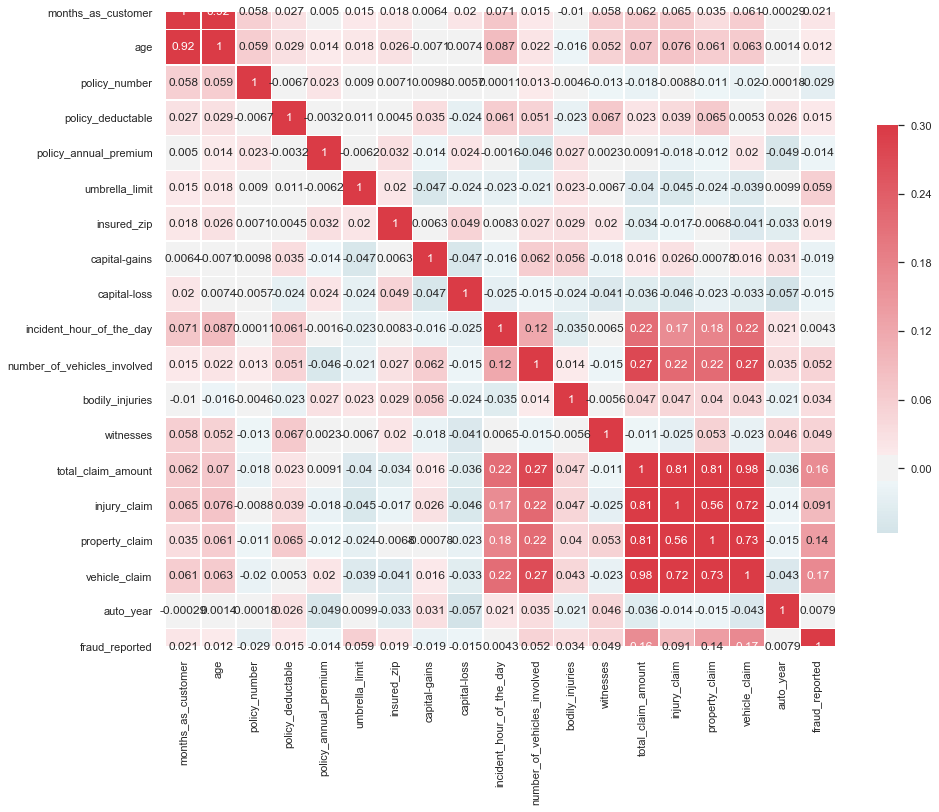

In [15]:
sns.set(style='white')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Variables with high correlation are:
* claim related values: injury, property, vehicle
* age and month_as_customer

#### Cramer V - categorical variables
[Article](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
Measure of association between two categorical features. Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
1. Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
1. Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [16]:
# Take only categorical data + target [0,1]
tmp = pd.concat([data.select_dtypes(include='category'), data[['fraud_reported']]])

In [17]:
#http://shakedzy.xyz/dython/
from dython.nominal import associations

# Cramer-V
result = associations(tmp, nominal_columns='all', return_results=True, plot=False)

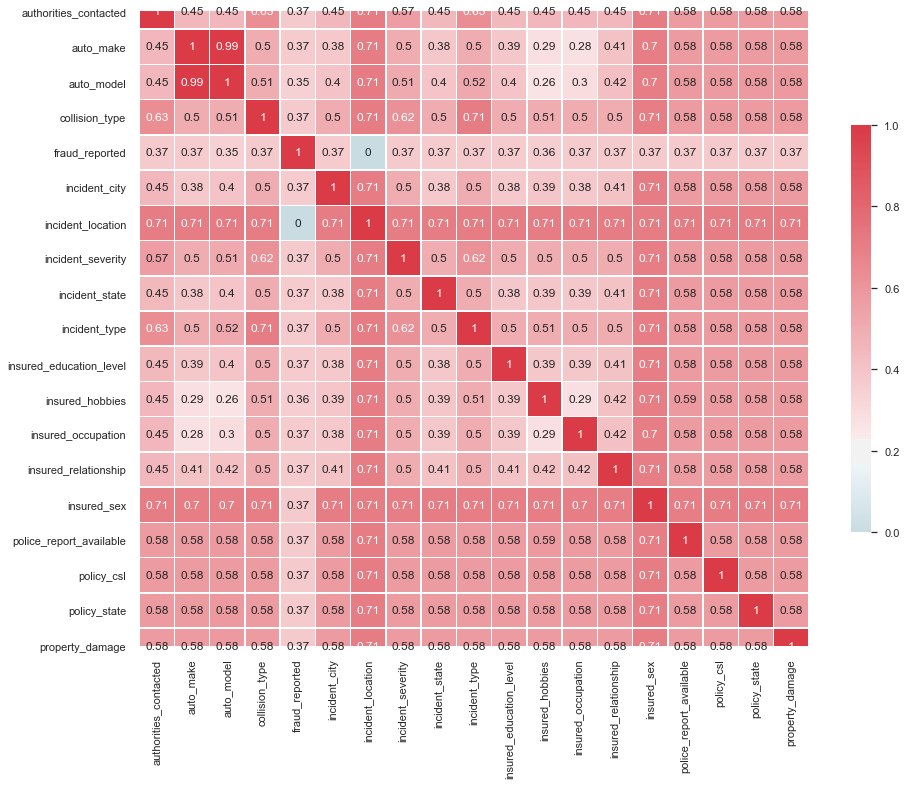

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(result, cmap=cmap, center=0.2, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Variables with high association are:
* auto_model and auto_make

#### Theil's U - asymmetric measure of association
Thinking over the output of Cramer’s V, I realized I’m losing valuable information due to the symmetry of it.

Theil’s U, also referred to as the Uncertainty Coefficient, is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V). Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.

In [19]:
# Theil-U
result = associations(tmp, nominal_columns='all', theil_u=True, return_results=True, plot=False)

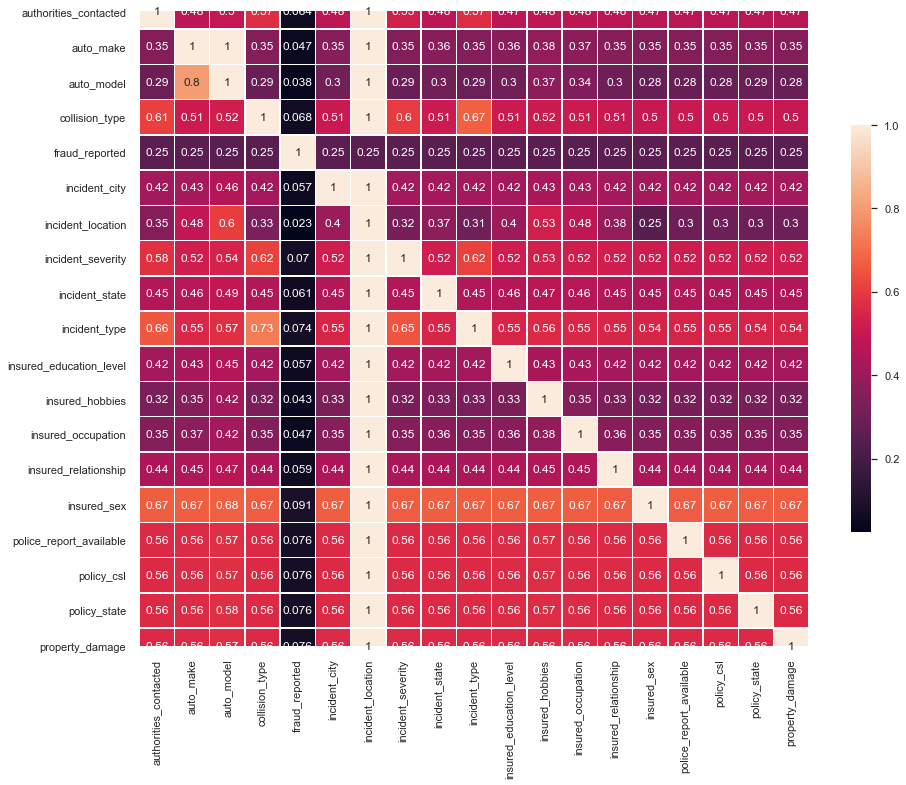

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(result, annot=True, 
            #cmap=cmap, center=0.2,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Now, we understand associations more precisely. 
* If we know auto_model (x-axis), we for sure know auto_make (y-axis) represented with 1. 
* But if we know auto_make, then we have association of 0.8 with auto_model.

Also, we see suspect that incident_location is an unique value, every claim happened on different location.

In [21]:
data.incident_location.nunique()

1000

In [22]:
data = data.drop(['incident_location'], axis=1)

#### Correlation ratio - numerical and categorical
But what about a pair of a continuous feature and a categorical feature? For this, we can use the Correlation Ratio (often marked using the greek letter eta). Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: 
    
    "Given a continuous number, how well can you know to which category it belongs to?"
    
Just like the two coefficients we’ve seen before, here too the output is on the range of [0,1].

In [26]:
import dython
dython.nominal.correlation_ratio(data.incident_type, data.total_claim_amount)

0.8362683735176175

Seems that knowing total_claim_amount we can tell pretty well which incident_type it is. True, we can broadly classify two types of incidents: 
* moving collisions and 
* stationary collisions / tefts

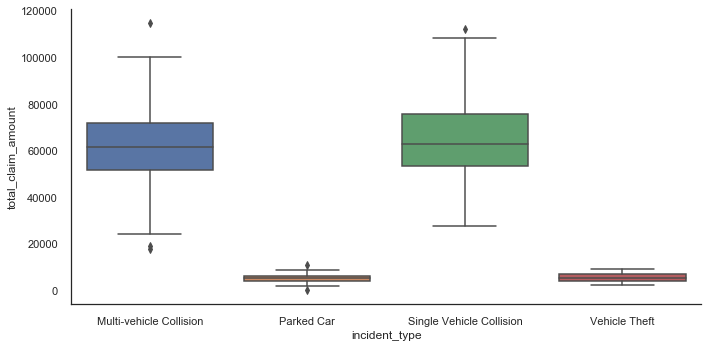

In [27]:
g = sns.catplot(x='incident_type',y='total_claim_amount',kind="box",aspect=2, data=data)
#_ = plt.setp(g.ax.get_xticklabels(), rotation=30)  # Rotate labels

### Check distribution of target across categorical features

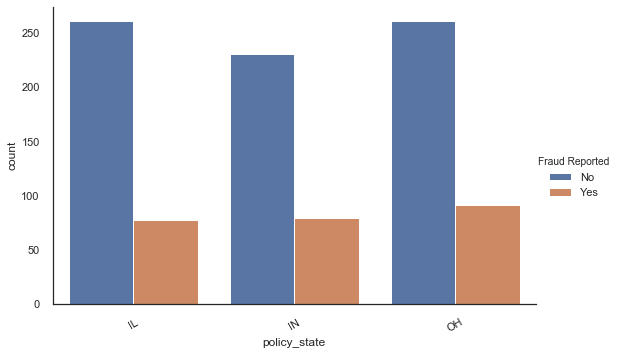

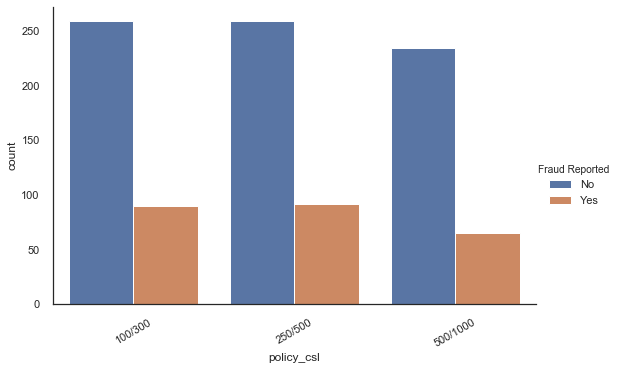

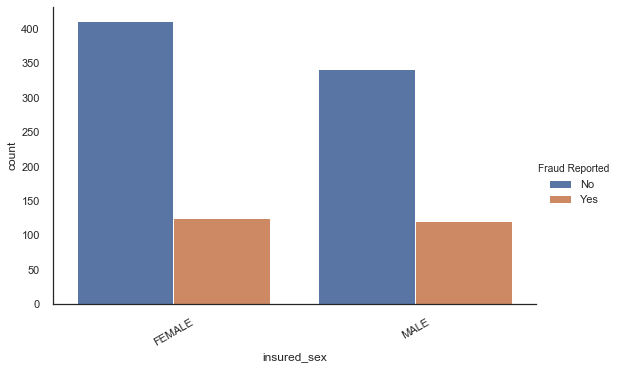

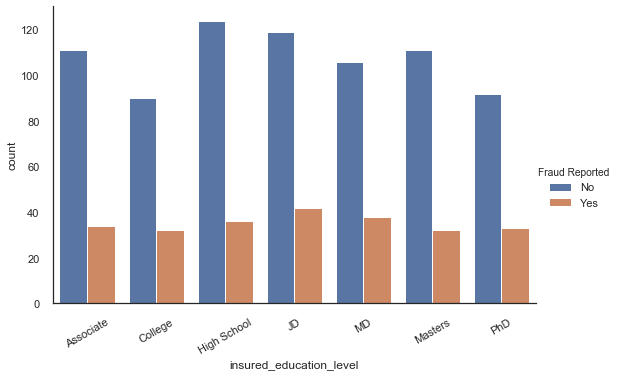

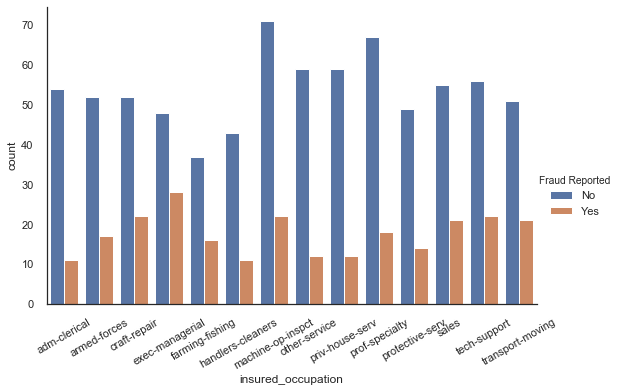

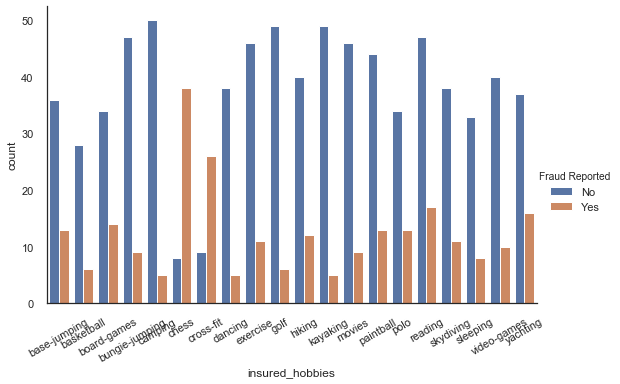

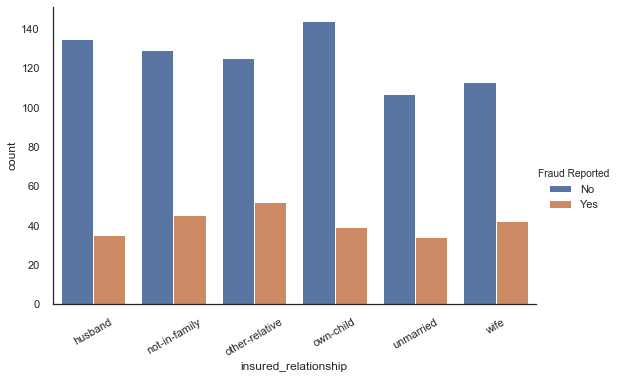

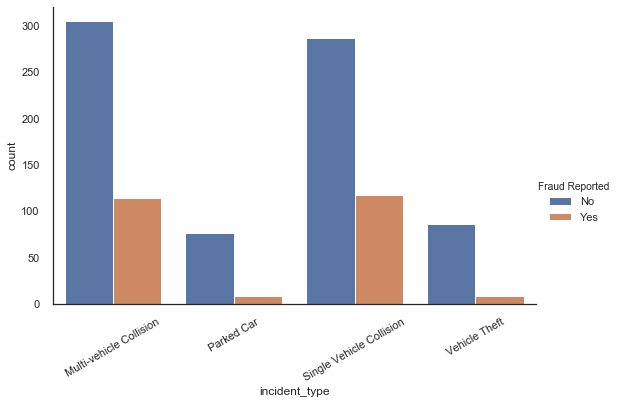

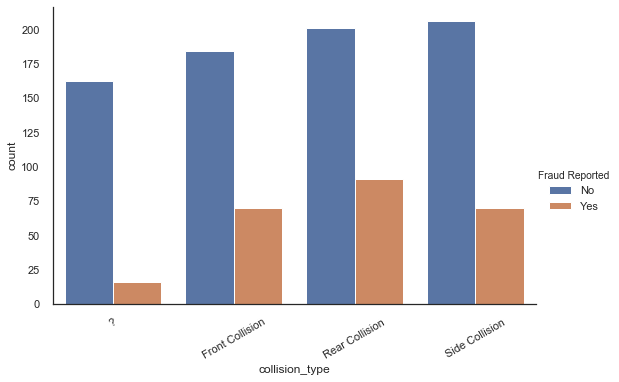

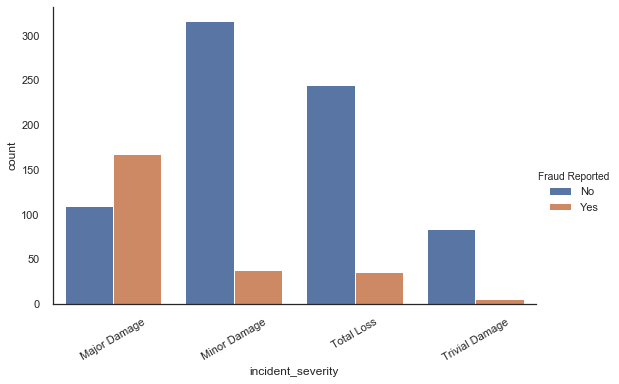

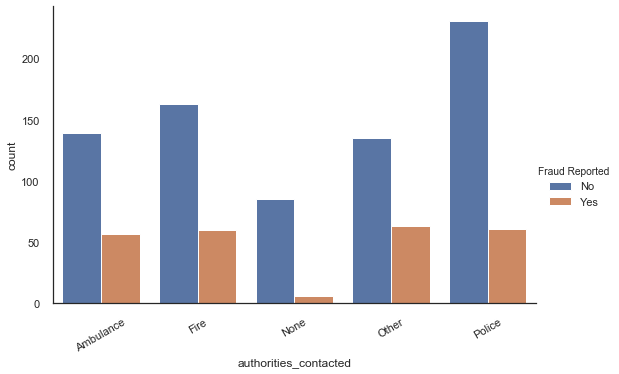

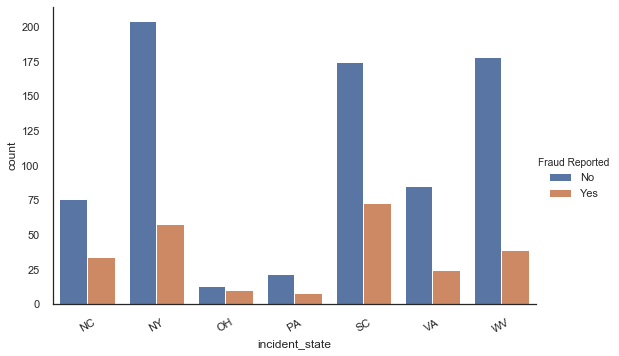

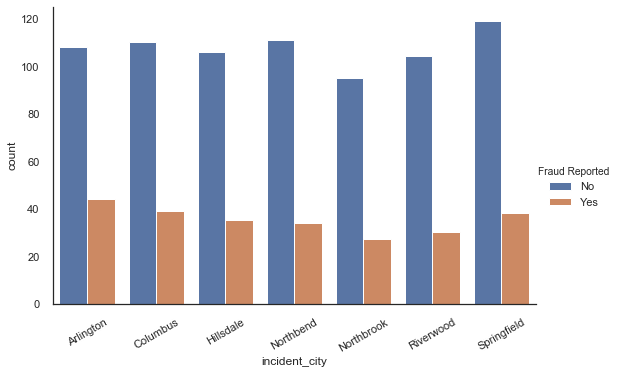

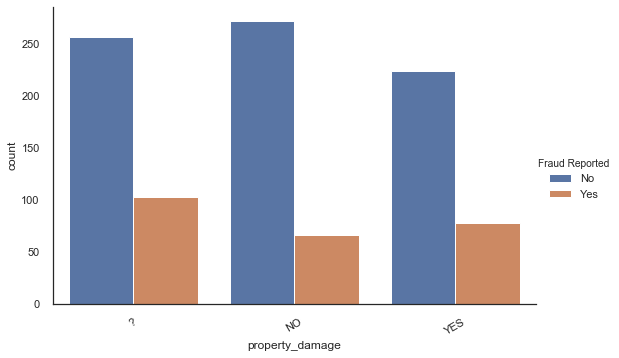

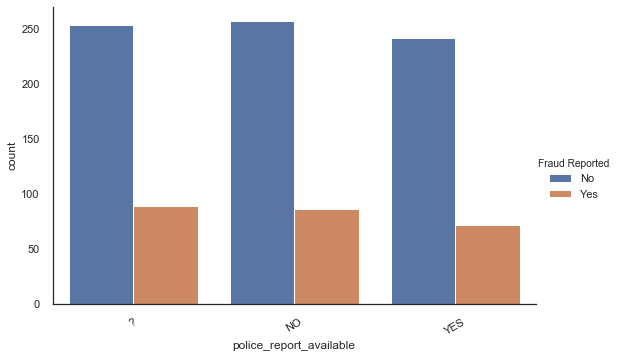

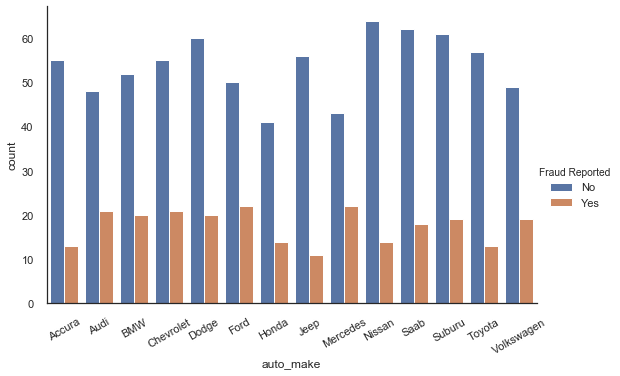

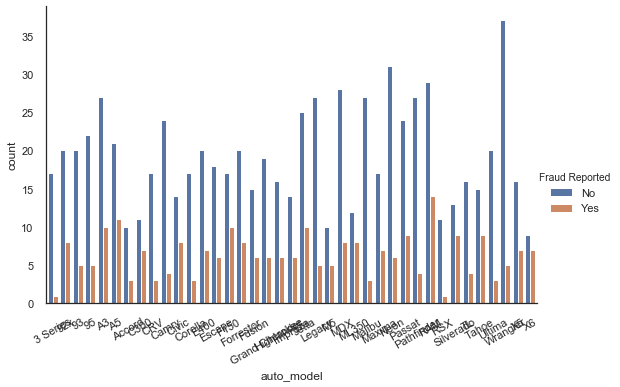

In [28]:
# Check distributions for fraud for categorical variables
for col in data.select_dtypes('category').columns:
    g = sns.catplot(x=col, hue='fraud_reported', kind='count', data=data,
                    aspect=1.5, legend_out=True)
    g.set_xticklabels(rotation=30)
    
    # Legend
    new_title = 'Fraud Reported'
    g._legend.set_title(new_title)  
    new_labels = ['No', 'Yes']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


In [25]:
data.groupby('insured_occupation').fraud_reported.value_counts(normalize=True).xs('Y', level=1).sort_values(ascending=False).head()

insured_occupation
exec-managerial     0.368421
farming-fishing     0.301887
craft-repair        0.297297
transport-moving    0.291667
tech-support        0.282051
Name: fraud_reported, dtype: float64

In [26]:
data.groupby('insured_hobbies').fraud_reported.value_counts(normalize=True).xs('Y', level=1).sort_values(ascending=False).head()

insured_hobbies
chess          0.826087
cross-fit      0.742857
yachting       0.301887
board-games    0.291667
polo           0.276596
Name: fraud_reported, dtype: float64

In [27]:
data.groupby('incident_severity').fraud_reported.value_counts(normalize=True).xs('Y', level=1).sort_values(ascending=False).head()

incident_severity
Major Damage      0.605072
Total Loss        0.128571
Minor Damage      0.107345
Trivial Damage    0.066667
Name: fraud_reported, dtype: float64

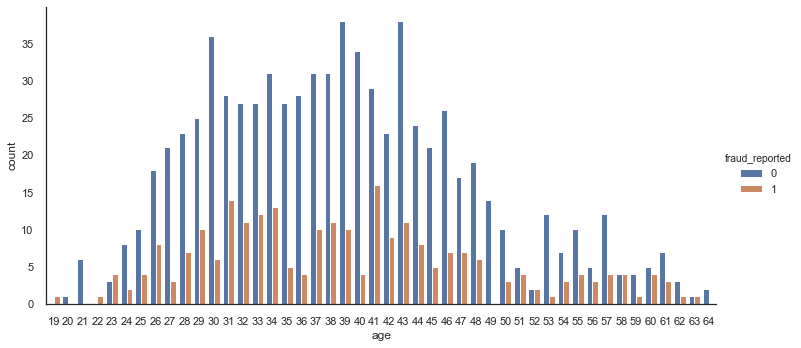

In [29]:
# Check distribution of fraud for age
sns.catplot(x='age', hue='fraud_reported', kind='count', data=data, aspect=2)

  insured_sex  fraud_reported  percentage
0      FEMALE               0   76.536313
2        MALE               0   73.866091
1      FEMALE               1   23.463687
3        MALE               1   26.133909


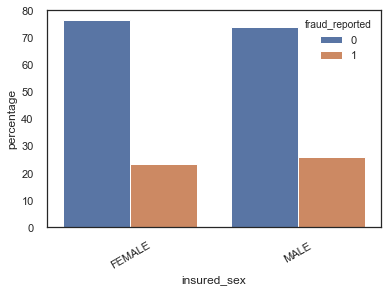

In [30]:
# Normalized counts
fraud_counts = (data.groupby(['insured_sex'])['fraud_reported']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('fraud_reported')
)
print(fraud_counts)

# plot
ax = sns.barplot(x="insured_sex", y="percentage", hue="fraud_reported", data=fraud_counts)
_ = plt.setp(ax.get_xticklabels(), rotation=30)  # Rotate labels

### Visualizing distributions 

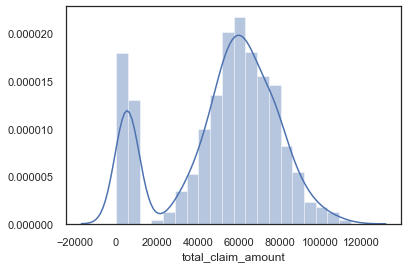

In [31]:
sns.distplot(data.total_claim_amount)

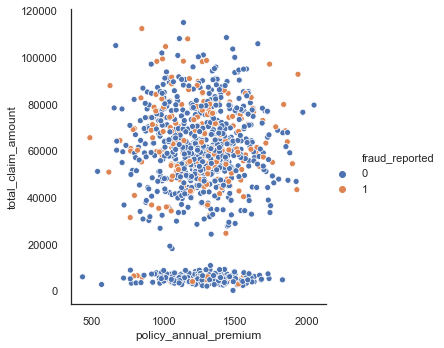

In [32]:
sns.relplot(x='policy_annual_premium', y='total_claim_amount', hue='fraud_reported', data=data);

Fraud is reported more often with claim amounts > 30000.

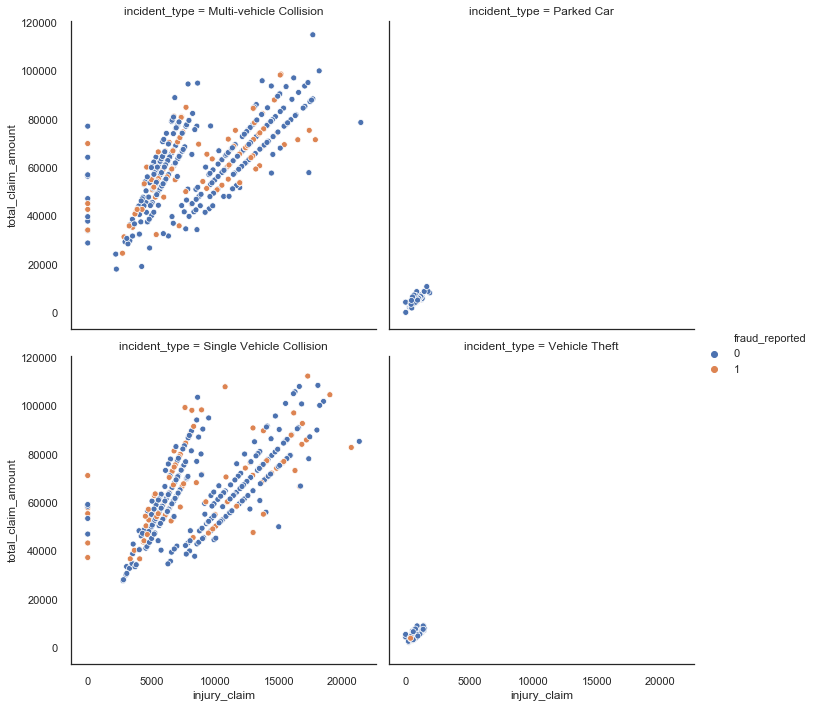

In [33]:
sns.relplot(x='injury_claim', y='total_claim_amount', hue='fraud_reported', col='incident_type', 
            col_wrap=2, data=data);

Collisions have majority of fraud. Total claim amount and injury claim show 3 groups of claims.

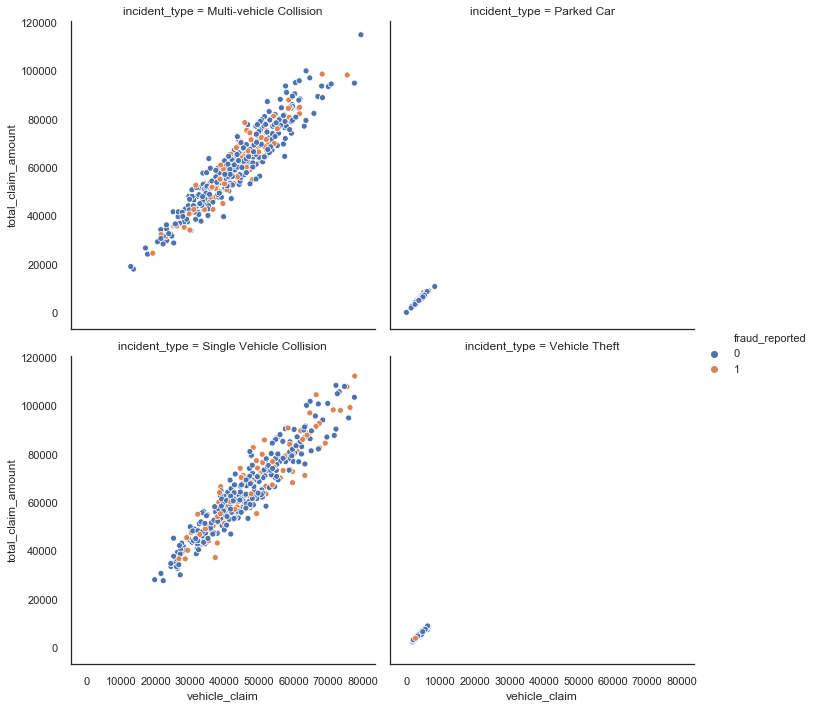

In [34]:
sns.relplot(x='vehicle_claim', y='total_claim_amount', hue='fraud_reported', col='incident_type', 
            col_wrap=2, data=data);

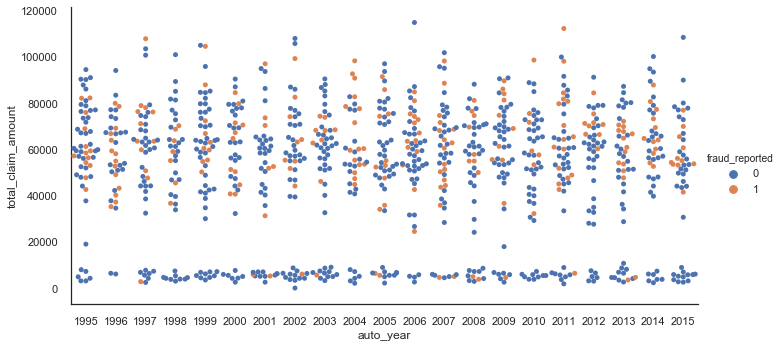

In [35]:
sns.catplot(x='auto_year', y='total_claim_amount', hue='fraud_reported', kind='swarm', data=data, 
            aspect=2);

Fraud is present with all car years.

In [36]:
cols = ['number_of_vehicles_involved', 'incident_type','bodily_injuries']

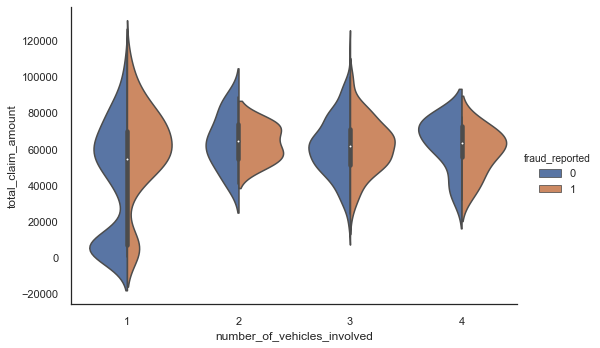

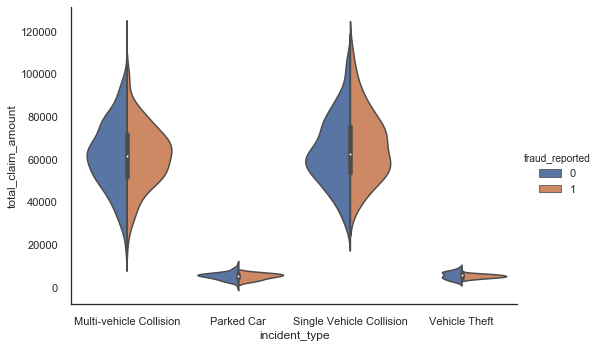

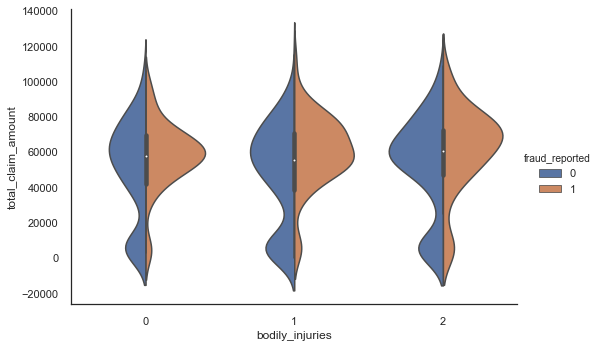

In [37]:
for col in cols:
    sns.catplot(x=col, y='total_claim_amount', hue='fraud_reported', kind='violin', data=data, 
                split=True, aspect=1.5);